# Joint Project Report 

In [1]:
from report import *

## Executive Summary

## Report

###  Model Approaches

#### Denormalization of Prices (Data Augmentation)

#### Discovered Time-ID Ordering and Implementation of Chaining

In [2]:
compare_timechains()

group1,group2,meandiff,p-adj,lower,upper,reject
extend2,extend3,-0.0001,0.9831,-0.0015,0.0013,False
extend2,simple,0.0027,0.0,0.0013,0.0041,True
extend3,simple,0.0028,0.0,0.0014,0.0042,True


#### Feature Engineering (Domain Knowledge)

#### Dimensionality Reduction and Clustering of Feature Space

### Evaluation Methods

#### RMSPE

#### Nested Cross-Validation

### Results and Discussion

#### Intermediary Methods

#### Final Ensemble Model

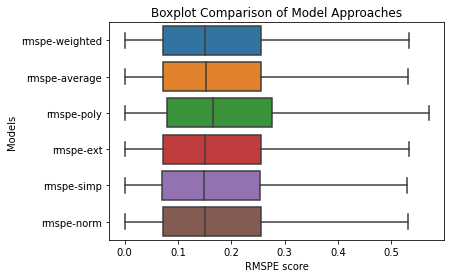

In [3]:
compare_models()

##### Model Explainability

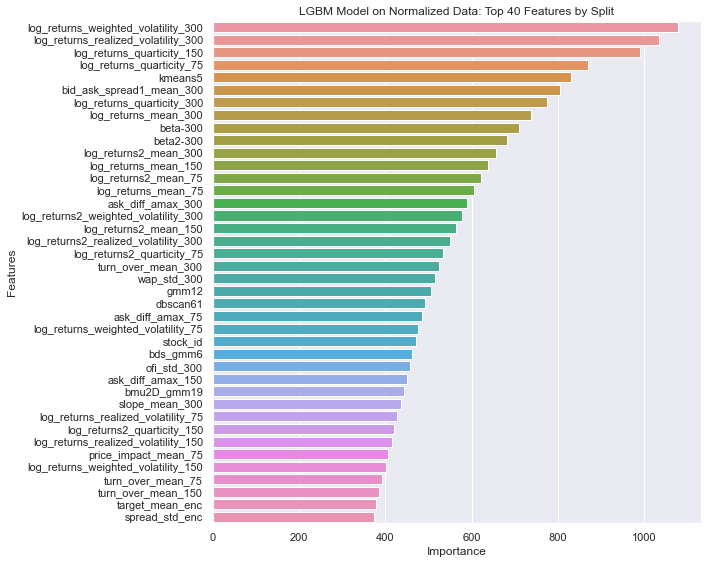

In [4]:
feature_importance_example()

### Communication Strategy


#### Application Features

### Conclusion and Future Work

## References

1. Brownlees, C., Engle, R., Kelly, B. (2011). A practical guide to volatility forecasting through calm and storm. The Journal of Risk, 14(2), 3-22. https://www.sas.upenn.edu/~fdiebold/papers/misc/Brownlees.pdf


2. Chakrabarti, G., Dias, R. (2021). Time-varying beta, market volatility and stress:
A comparison between the United States and India. IIMB Management Review, 33, 50-63. https://doi.org/10.1016/j.iimb.2021.03.003


3. Chen, W., Yao, J., Shao, Y.  (2023). Volatility forecasting using deep neural network with time-series feature embedding. Economic Research-Ekonomska Istrazivanja, 36(1), 1377-1401. https://doi.org/10.1080/1331677X.2022.2089192


4. Hong, Y., Lee, Y. (2017). A general approach to testing volatility models in time series. JMSE, 2(1), 1-33. doi:10.3724/SP.J.1383.201001


5. Munk, C. (2007). Financial asset pricing theory. Oxford University Press.


6. Neusser, K. (2016). Time Series Econometrics. Springer.


7. Tofallis, C. (n.d.). Investment volatility: A critique of standard beta estimation and a simple way forward. Department of Management Systems, University of Hetfordshire, 1-16. https://arxiv.org/pdf/1109.4422.pdf

## Student Contributions

| Student      | Unikey | Contribution     |
| :---:        |    :----:   |          :--- |
| Harry     |       | Harry was responsible for helping prepare and present weekly updates and working to brainstorm ideas with the group during weekly meetings. He has worked on designing and creating the Shiny app, along with incorporating the model, results and communication into a PowerPoint slide deck and a script for the final presentation. In the report, Harry was responsible for writing up the executive summary, background, discussion and conclusion, along with producing relevant graphics and integrating the final report through editing and reviewing.  | 
| Michael   | Text        | And more      |
| Numan   | Text        | And more      |
| Cody   | Text        | And more      |
| Yidan   | Text        | And more      |
| Yimeng   | Text        | And more      |